In [1]:
! python3 -m pip install --upgrade pip
! python3 -m pip install --upgrade numpy matplotlib pandas seaborn

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [2]:
import numpy as np              # біблиотека для аналізу даних
import pandas as pd             # біблиотека для аналізу даних

import matplotlib.pyplot as plt # Інтерфейс Matplotlib
import seaborn as sns           # Інтерфейс Seaborn

In [3]:
from IPython.display import Image, HTML     # Вбудовані функції для зручної роботи
Image(url='https://seaborn.pydata.org/_static/logo-wide-lightbg.svg')

Seaborn is a Python data visualization library based on **matplotlib**. It provides a high-level interface for drawing attractive and informative statistical graphics.

In [89]:
iris = pd.read_csv('../datasets/iris.csv', index_col='Id')
flights = pd.read_csv('../datasets/flights.csv')
mtcars = pd.read_csv('../datasets/mtcars.csv')
mtcars['carb'] = mtcars['carb'].astype(str)

xs = np.linspace(0, 2, 100)
df = pd.DataFrame({'x': xs, 'y': xs, 'y2': xs ** 2, 'y3': xs ** 3})
df.head(3)

,x,y,y2,y3
0,0.000000,0.000000,0.000000,0.000000
1,0.020202,0.020202,0.000408,0.000008
2,0.040404,0.040404,0.001632,0.000066


In [5]:
IATA_org = {'ORD': 'O`Hare International Airpor', 'SFO': 'San Francisco International Airport',
            'JFK': 'John F. Kennedy International Airport', 'LGA': 'LaGuardia Airport', 'SMF': 'Sacramento International Airport',
            'SJC': 'San Jose International Airport', 'TUS': 'Tucson International Airport', 'OGG': 'Kahului Airport'}

In [6]:
def sinplot(flip=1):
    x = np.linspace(0, 14, 100)
    for i in range(1, 7):
        plt.plot(x, np.sin(x + i * .5) * (7 - i) * flip)

## Налаштування

#### Налаштування Matplotlib

In [7]:
plt.ion()
%matplotlib inline

#### Стилі
https://seaborn.pydata.org/generated/seaborn.set_style.html  
`darkgrid, whitegrid, dark, white, ticks`

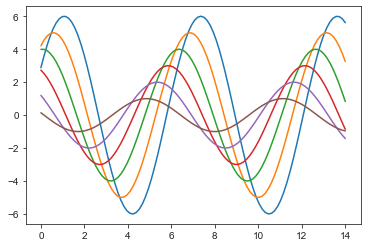

In [8]:
sns.set_style(style='ticks', rc=None)
sinplot()

#### Палітри
https://seaborn.pydata.org/tutorial/color_palettes.html  
``

In [9]:
plt.colormaps()

['Accent',
 'Accent_r',
 'Blues',
 'Blues_r',
 'BrBG',
 'BrBG_r',
 'BuGn',
 'BuGn_r',
 'BuPu',
 'BuPu_r',
 'CMRmap',
 'CMRmap_r',
 'Dark2',
 'Dark2_r',
 'GnBu',
 'GnBu_r',
 'Greens',
 'Greens_r',
 'Greys',
 'Greys_r',
 'OrRd',
 'OrRd_r',
 'Oranges',
 'Oranges_r',
 'PRGn',
 'PRGn_r',
 'Paired',
 'Paired_r',
 'Pastel1',
 'Pastel1_r',
 'Pastel2',
 'Pastel2_r',
 'PiYG',
 'PiYG_r',
 'PuBu',
 'PuBuGn',
 'PuBuGn_r',
 'PuBu_r',
 'PuOr',
 'PuOr_r',
 'PuRd',
 'PuRd_r',
 'Purples',
 'Purples_r',
 'RdBu',
 'RdBu_r',
 'RdGy',
 'RdGy_r',
 'RdPu',
 'RdPu_r',
 'RdYlBu',
 'RdYlBu_r',
 'RdYlGn',
 'RdYlGn_r',
 'Reds',
 'Reds_r',
 'Set1',
 'Set1_r',
 'Set2',
 'Set2_r',
 'Set3',
 'Set3_r',
 'Spectral',
 'Spectral_r',
 'Wistia',
 'Wistia_r',
 'YlGn',
 'YlGnBu',
 'YlGnBu_r',
 'YlGn_r',
 'YlOrBr',
 'YlOrBr_r',
 'YlOrRd',
 'YlOrRd_r',
 'afmhot',
 'afmhot_r',
 'autumn',
 'autumn_r',
 'binary',
 'binary_r',
 'bone',
 'bone_r',
 'brg',
 'brg_r',
 'bwr',
 'bwr_r',
 'cividis',
 'cividis_r',
 'cool',
 'cool_r',
 'co

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

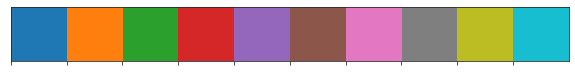

In [10]:
palette = sns.color_palette("tab10") # viridis, tab10
display(palette)
sns.palplot(palette)

In [11]:
sns.set_palette(palette)

#### Контекст
https://seaborn.pydata.org/generated/seaborn.set_context.html  
`paper, notebook, talk, poster`

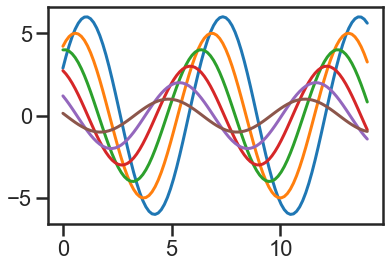

In [12]:
sns.set_context(context='poster', font_scale=1, rc=None)
sinplot()

#### Розмір

In [13]:
sns.set(style='ticks', context='notebook', rc={'figure.figsize': (6.4, 4.8)})
# sns.set(style='ticks', rc=None)

### Як побудувати графік?

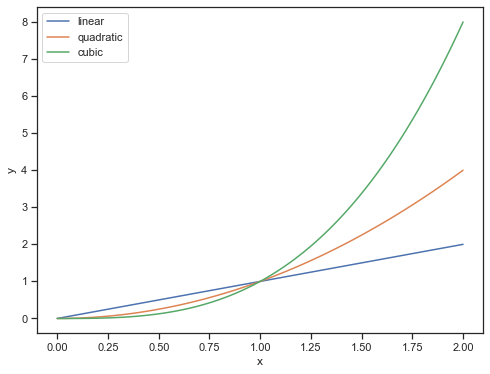

In [14]:
# Pyplot-style
plt.figure(figsize=[8,6])
sns.lineplot(x='x', y='y', label='linear', data=df)
sns.lineplot(x='x', y='y2', label='quadratic', data=df)
sns.lineplot(x='x', y='y3', label='cubic', data=df)
plt.show()

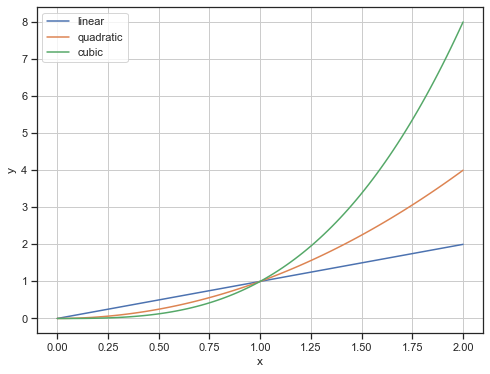

In [15]:
# OOP-style
# ax = plt.gca() # Get the current Axes instance on the current figure
fig, ax = plt.subplots(figsize=[8,6])
sns.lineplot(x='x', y='y', label='linear', data=df, ax=ax)
sns.lineplot(x='x', y='y2', label='quadratic', data=df, ax=ax)
sns.lineplot(x='x', y='y3', label='cubic', data=df, ax=ax)

ax.legend()  # Add a legend.
ax.grid() # Add grid
plt.show()

### Типи графіків
Прості графіки  
* **lineplot()** - лінійний графік
* **scatterplot()** - точковий графік
* **barplot()** - стовпчикова діаграмма
* **heatmap()** - теплова діаграмма  
* **boxplot() / violinplot() / boxenplot()** - діаграма box-and-whiskers
* **histplot() / kdeplot() / ecdfplot()** - гістограмма  
* **countplot()**  
* **pointplot()** 
* **stripplot()**
* **swarmplot()**
* **regplot()**
* **residplot()**

Множинні графіків  
* **pairplot()** - графік відношення двох змінних  
* **jointplot()** - графік відношення двох змінних  
* **relplot()** - графік відношення двох змінних  
* **catplot()** - графік для категоріальних змінних
* **displot()** - розподілення числових змінних
* **lmplot()** - лінійна регресія
### Додаткові функції
* **FacetGrid()**
* **PairGrid()**
* **JointGrid()**

### Lineplot
https://seaborn.pydata.org/generated/seaborn.lineplot.html

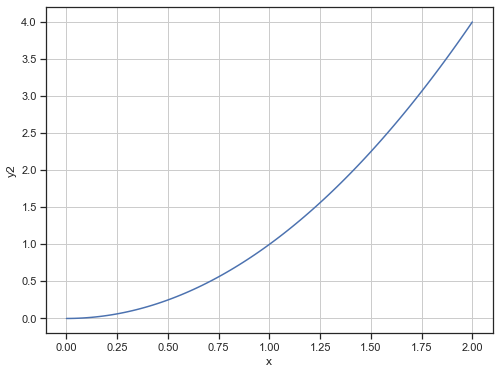

In [16]:
plt.figure(figsize=[8,6])
sns.lineplot(x='x', y='y2', data=df,
            )
plt.grid() # Add grid
plt.show()

### Scatterplot
https://seaborn.pydata.org/generated/seaborn.scatterplot.html

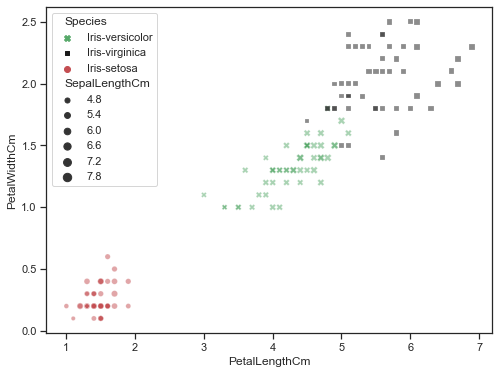

In [17]:
plt.figure(figsize=[8,6])
sns.scatterplot(x='PetalLengthCm', y='PetalWidthCm', marker='p', data=iris,
                hue='Species', style='Species',
                hue_order=['Iris-versicolor', 'Iris-virginica', 'Iris-setosa'],
                palette={'Iris-setosa': 'r', 'Iris-versicolor': 'g', 'Iris-virginica': 'k'},
                size='SepalLengthCm', 
                alpha=0.5
               )
plt.show()

### Barplot
https://seaborn.pydata.org/generated/seaborn.barplot.html

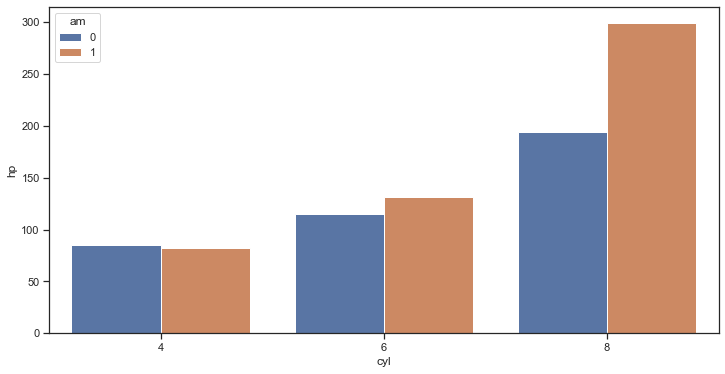

In [18]:
plt.figure(figsize=(12,6))
sns.barplot(data=mtcars, x='cyl', y='hp', 
            hue='am',
            ci=None
           )
plt.show()

### Pointplot
https://seaborn.pydata.org/generated/seaborn.pointplot.html

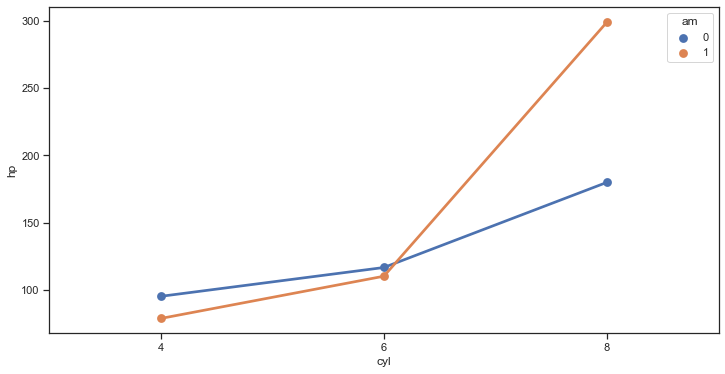

In [19]:
plt.figure(figsize=[12,6])
sns.pointplot(data=mtcars, x='cyl', y='hp',
              hue='am', join=True,
              estimator=np.median,
              capsize=0.1,
              ci=None
             )
plt.show()

### Pieplot

In [20]:
HTML("""
<iframe width="560" height="315" src="https://www.youtube.com/embed/dQw4w9WgXcQ?start=43&autoplay=1" 
title="YouTube video player" frameborder="0" allow="accelerometer; 
autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen>
</iframe>
""")

### Heatmap
https://seaborn.pydata.org/generated/seaborn.heatmap.html

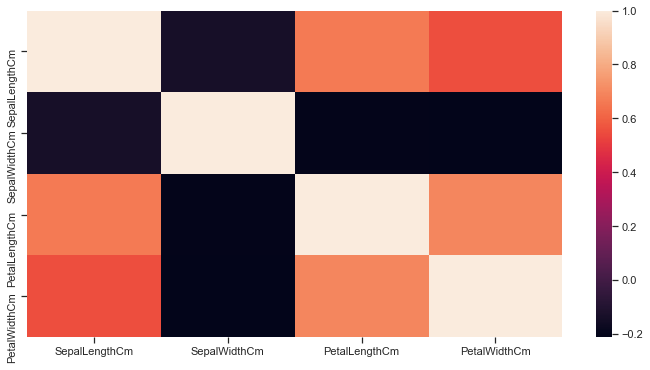

In [25]:
corrs = iris.corr(method='kendall') # seismic
horses = pd.crosstab(mtcars['cyl'], mtcars['gear'], mtcars['hp'], aggfunc='mean') # hot_r

plt.figure(figsize=[12,6])
sns.heatmap(data=corrs,
#             annot=True, fmt='.1f',
#             square=True,
#             cmap='hot_r',
#             cbar=False
           )
plt.show()

### Boxplot
https://seaborn.pydata.org/generated/seaborn.boxplot.html

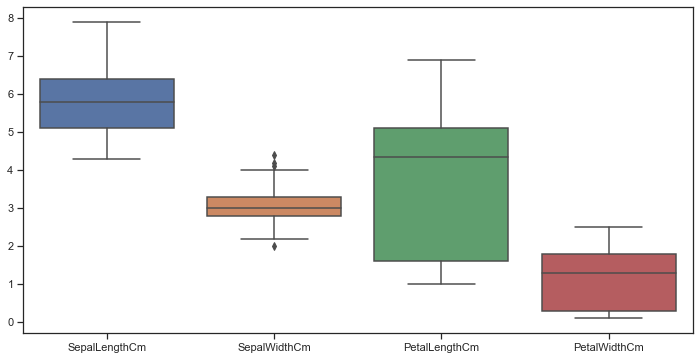

In [26]:
floats = iris.select_dtypes(float)
plt.figure(figsize=[12,6])
sns.boxplot(data=iris,
#             x='SepalLengthCm', 
#             y='Species',
#             hue='Species',
#             whis=[5, 95],
           )
plt.show()

### Histplot
https://seaborn.pydata.org/generated/seaborn.histplot.html

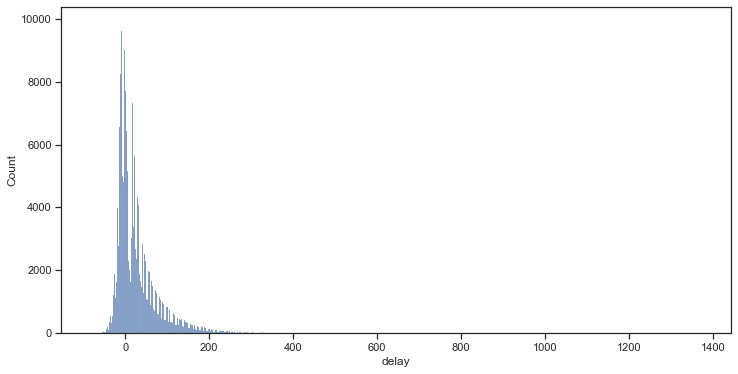

In [27]:
# stat=“count”, “frequency”, “density”, “probability”
plt.figure(figsize=[12,6])
ax = sns.histplot(data=flights, x='delay', stat='count',
#              bins=100, cumulative=False, kde=False, 
            )
plt.show()

### Countplot
https://seaborn.pydata.org/generated/seaborn.countplot.html

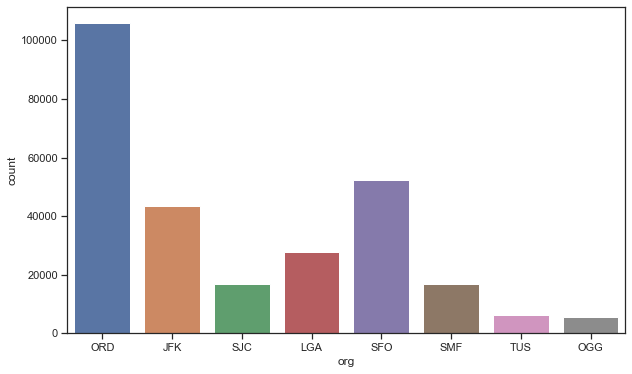

In [30]:
plt.figure(figsize=[10,6])
ax = sns.countplot(x='org', orient='v', data=flights,
#                    order=flights['org'].value_counts().index,
#                    hue='carrier',
                  )
# ax.set_xticklabels(IATA_org.values())
# ax.tick_params(rotation=90)
plt.show()

### Regplot
https://seaborn.pydata.org/generated/seaborn.regplot.html

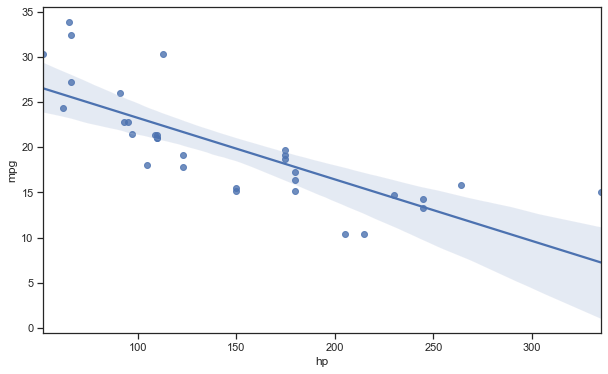

In [31]:
plt.figure(figsize=[10,6])
ax = sns.regplot(x='hp', y='mpg', data=mtcars,
#                  scatter=True, fit_reg=True,
#                  order=2, 
#                  x_bins=20,
#                  x_estimator=np.mean,
                 )
plt.show()

### Кастомізація простих графіків

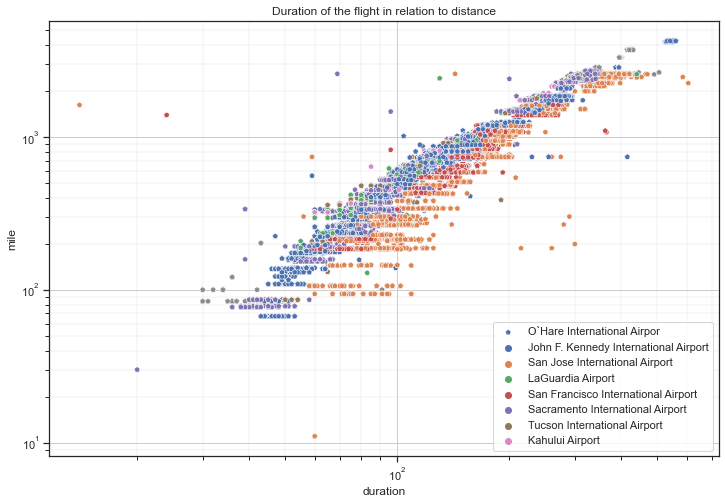

In [32]:
plt.figure(figsize=[12,8])

ax = sns.scatterplot(x='duration', y='mile', hue='org', marker='p', data=flights)
ax.set_title("Duration of the flight in relation to distance")
ax.set_xscale('log')
ax.set_yscale('log')

ax.xaxis.grid(True, "minor", linewidth=.25)
ax.yaxis.grid(True, "minor", linewidth=.25)

new_labels = [IATA_org[l.get_text()] for l in ax.get_legend().get_texts()]
ax.legend(new_labels, loc="lower right")
ax.grid()

plt.show()

### Стандартні множинні графіки

### Displot
https://seaborn.pydata.org/generated/seaborn.displot.html

<class 'seaborn.axisgrid.FacetGrid'>


<Figure size 720x432 with 0 Axes>

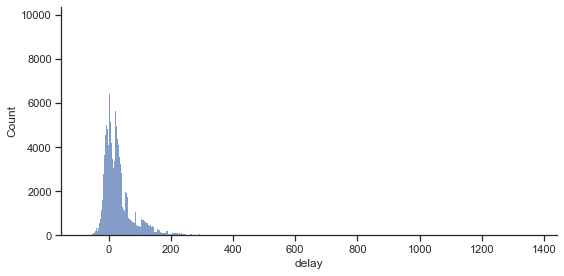

In [33]:
# stat=“count”, “frequency”, “density”, “probability”
# kind="hist", "kde", "ecdf"
plt.figure(figsize=[10,6])
g = sns.displot(kind='hist', height=4, aspect=2, data=flights, x='delay', stat='count', 
#                 bins=30, binrange=(-100, 500), cumulative=False, 
#                 kde=False, discrete=False,
#                 row='org', col='carrier',
               )
print(type(g))
plt.show()

### Pairlot
https://seaborn.pydata.org/generated/seaborn.pairplot.html

<class 'seaborn.axisgrid.PairGrid'>


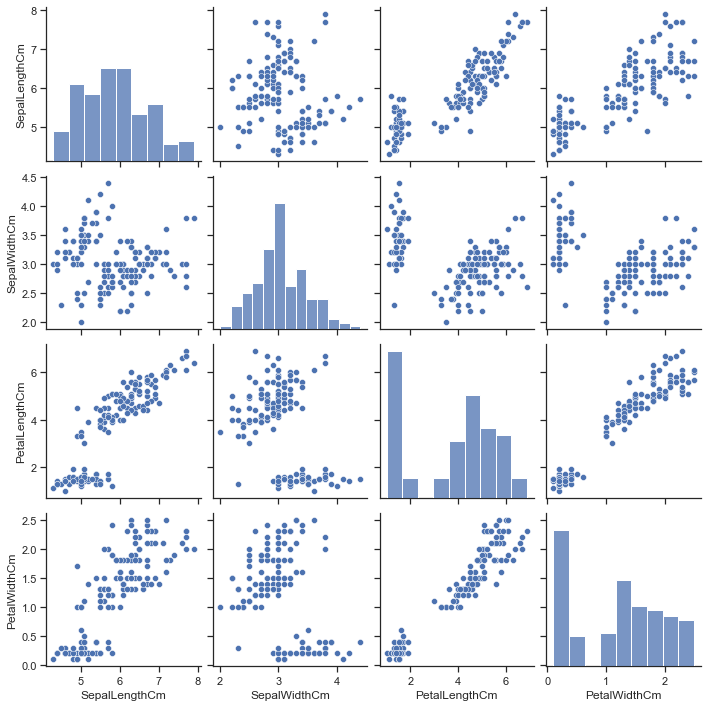

In [34]:
# kind = 'scatter', 'line', 'reg'
# diag_kind = ‘auto’, ‘hist’, ‘kde’, None
g = sns.pairplot(iris, kind='scatter',
#                  diag_kind='hist',
#                  hue="Species",
#                  plot_kws={'alpha': 0.5}
                )
print(type(g))
plt.show()

### Jointplot
https://seaborn.pydata.org/generated/seaborn.jointplot.html

<class 'seaborn.axisgrid.JointGrid'>


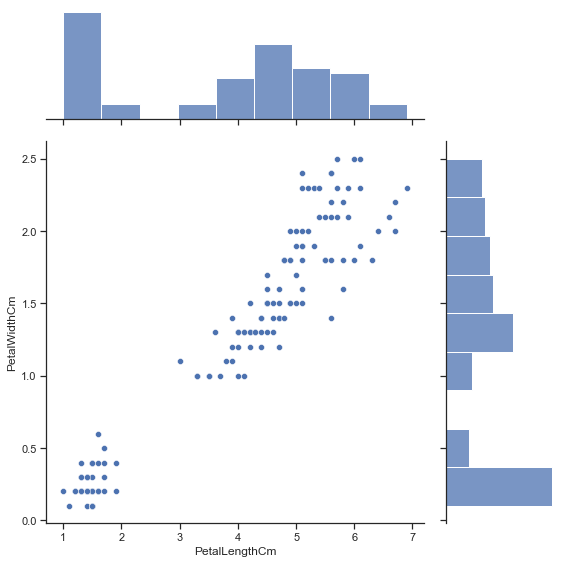

In [75]:
# kind = 'scatter', 'kde',  'hist', 'hex', 'reg', 'resid'
g = sns.jointplot(data=iris, height=8, ratio=3, x='PetalLengthCm', y='PetalWidthCm',
#                   kind='scatter',
#                   hue='Species',
#                   space=1,
#                   marginal_ticks=True,
# #                   marginal_kws={'bins': 20}, # Only when marginal is hist, or disable hue
#                   joint_kws={'marker': 'p', 's': 100},
                 )
print(type(g))
plt.show()

### Relplot
https://seaborn.pydata.org/generated/seaborn.relplot.html

<class 'seaborn.axisgrid.FacetGrid'>


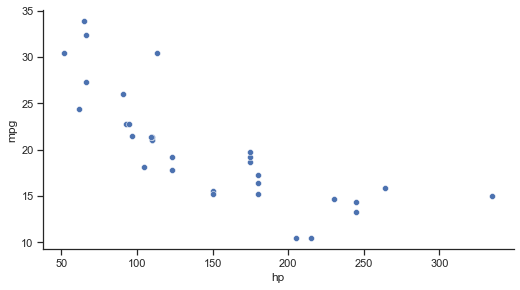

In [93]:
g = sns.relplot(data=mtcars, height=4, aspect=1.8, legend="full", kind='scatter', x="hp", y="mpg", 
#                 hue="carb", palette='rainbow', hue_order=['1','2','3','4','6','8'],
#                 size="cyl", sizes={4:50, 6:100, 8:150}, size_order=[8,6,4],
#                 row='gear', col='am', 
#                 style='carb',
               )
print(type(g))
plt.show()

### Catplot
https://seaborn.pydata.org/generated/seaborn.catplot.html

<class 'seaborn.axisgrid.FacetGrid'>


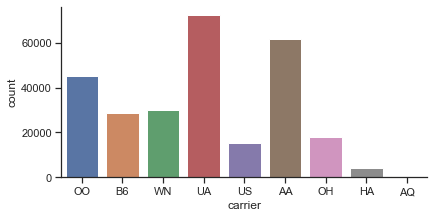

In [94]:
# kind = 'strip', 'swarm', 'box', 'violin', 'boxen', 'point', 'bar', 'count'
g = sns.catplot(data=flights, height=3, aspect=2, legend="full", kind='count', x='carrier',
#                 col='org', 
#                 col_wrap=2,
               )
print(type(g))
plt.show()

### Lmplot
https://seaborn.pydata.org/generated/seaborn.lmplot.html

<class 'seaborn.axisgrid.FacetGrid'>


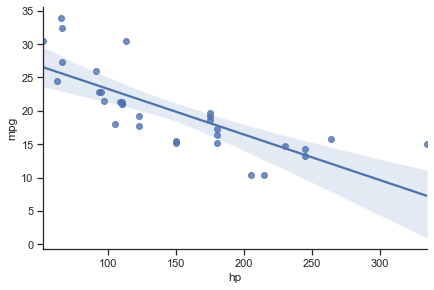

In [95]:
g = sns.lmplot(x='hp', y='mpg', data=mtcars, height=4, aspect=1.5,
#                col='am', row='cyl'
          )
print(type(g))
plt.show()

### Користувацькі множинні графіки

In [ ]:
g = sns.FacetGrid(mtcars, row="gear", col="cyl", height=3, aspect=2, legend_out=True)

g.map(sns.scatterplot, 'hp', 'qsec', 'am')
g.map_dataframe(sns.scatterplot, x='hp', y='qsec', hue='am', hue_order=[0, 1], legend=True)
g.add_legend(title="Transmission type", loc='upper right')

plt.show()

### Кастомні множинні графіки

In [ ]:
def pieplot(x, **kwargs):
    data = x.value_counts().to_frame().reset_index()
    plt.pie(x=x.name, labels='index', autopct='%.2f%%', data=data)

g = sns.FacetGrid(flights, col="org", col_wrap=4, height=4)
g.map(pieplot, "carrier")
plt.show()

### Форматування множинних графіків

In [96]:
IATA_carrier = {'OO': 'Skywest Airlines', 'B6': 'Jetblue Airways', 'WN': 'Southwest Airlines', 
                'UA': 'United Airlines', 'AA': 'American Airlines', 'OH': 'Jetstream International', 
                'HA': 'Hawaiian Airlines', 'AQ': '9 Air Co Ltd', 'US': 'Puerto Rico Airlines'}
IATA_org = {'ORD': 'O`Hare International Airpor', 'SFO': 'San Francisco International Airport',
            'JFK': 'John F. Kennedy International Airport', 'LGA': 'LaGuardia Airport', 'SMF': 'Sacramento International Airport',
            'SJC': 'San Jose International Airport', 'TUS': 'Tucson International Airport', 'OGG': 'Kahului Airport'}

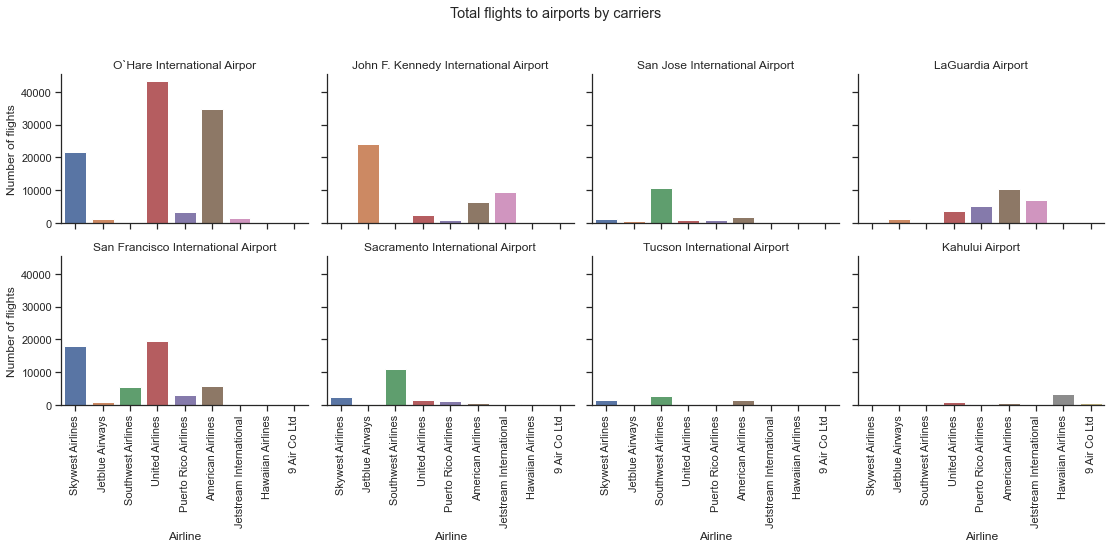

In [97]:
g = sns.catplot(kind='count', x='carrier',  col='org', col_wrap=4, data=flights, height=3, aspect=1.3)
g.fig.suptitle("Total flights to airports by carriers", y=1.03)
g.col_names = [IATA_org[l] for l in g.col_names]
g.set_titles("{col_name}")
g.set_xlabels("Airline")
g.set_ylabels("Number of flights")
g.tight_layout()
g.set_xticklabels([IATA_carrier[xt.get_text()] for xt in g.axes[4].get_xticklabels()], rotation=90)
plt.show()

### Матеріали
* https://learn.datacamp.com/courses/introduction-to-data-visualization-with-seaborn
* https://learn.datacamp.com/courses/intermediate-data-visualization-with-seaborn